In [1]:
import pickle
import datetime
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing saved data from our July 15th experiment
data_with_time_array = pickle.load(open('exp_07_15_good_data.p', 'rb'))

In [3]:
# checking end timestamp of data
datetime.datetime.fromtimestamp(data_with_time_array[-1,12])

datetime.datetime(2020, 7, 15, 16, 58, 59, 581090)

In [4]:
# omitting the last column which has timestamps
data = data_with_time_array[:,:12]

In [5]:
data.shape

(628426, 12)

In [6]:
# calculating nanmean and subtracting it from data. Then replacing all nans by 0

data_mean = np.nanmean(data,axis = 0,keepdims = True)

data = data - data_mean

cdata=np.nan_to_num(data)

/home/ardelalegre/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# calculating the covariance matrix


from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.cluster import KMeans

from numpy import linalg as LA

d=12  # dimension
n=cdata.shape[0]
block_size=10000
# calculate covariance matrix

outters = np.zeros((d, d))
for j in range(n):
    outters += np.outer(cdata[j,:],cdata[j,:])
    if j%block_size==0:
        print('\r %d: '%j,end='')
    
_cov = outters/n

#eigen values
eigen_values, eigen_vectors = LA.eig(_cov)


 620000: 

In [8]:
eigen_values

array([0.15070907, 0.1069781 , 0.06510312, 0.04753102, 0.03958284,
       0.01750848, 0.0097031 , 0.00254267, 0.00416056, 0.        ,
       0.        , 0.        ])

In [9]:
# sorting eigenvalues according to magnitude

eig_val_sorted_indices = np.argsort(eigen_values)
print(eig_val_sorted_indices)
eig_val_sorted_indices = eig_val_sorted_indices[-1::-1]
print(eig_val_sorted_indices)
eig_val_sorted_indices.shape

[ 9 10 11  7  8  6  5  4  3  2  1  0]
[ 0  1  2  3  4  5  6  8  7 11 10  9]


(12,)

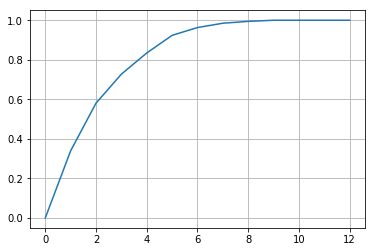

In [10]:
eig_val_ordered=eigen_values[eig_val_sorted_indices]
eig_val_cumul = np.cumsum(eig_val_ordered)
eig_val_cumul /= eig_val_cumul[-1]
plot([0]+list(eig_val_cumul))
grid()

In [11]:
sorted_eigvec = eigen_vectors[:,eig_val_sorted_indices]

In [12]:
# projecting the mean subtracted data onto the most important eigenvectors

data_proj_ev1 = np.dot(cdata,sorted_eigvec[:,:2])

### Plotting on Eigenvectors

In [13]:
N=data_proj_ev1.shape[0]
time_axis = np.arange(N)
type(time_axis)

numpy.ndarray

In [14]:
#setting limits - right indicates upper limit and left indicates lower limit

righty = 1.25
lefty = -1
rightx = 1.5
leftx = -1.5

Each plot represents activity for 280.0 seconds


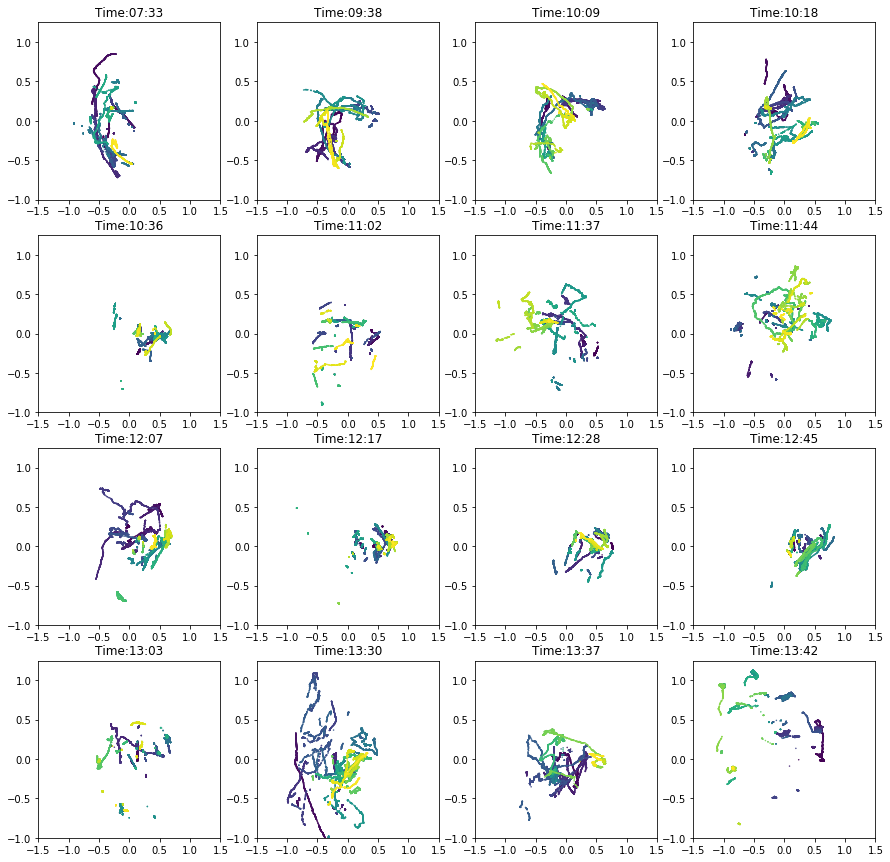

In [15]:
# plotting projections for all data (not just some interval during the day)

figure(figsize=[15,15])
Length=35000
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,data.shape[0],Length):
    subplot(4,4,i)
    
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[T1,12]))[11:16])
    scatter(data_proj_ev1[T1:T1+Length,0], data_proj_ev1[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    i=i+1
    if (i>16):
        break

### Plotting interval data

In [16]:
# setting the start and end times in the correct format
# this cell converts date and hour into timestamp and prints the starting and ending timestamps

format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Jul 15 2020 01:40PM'
end_timestring = 'Jul 15 2020 02:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

2020-07-15 13:40:00
2020-07-15 14:00:00


In [17]:
# given the starting and ending timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,12] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,12] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,12] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break

Each plot represents activity for 846.464 seconds


Text(0.5, 0, 'Projection of data on largest eigenvector')

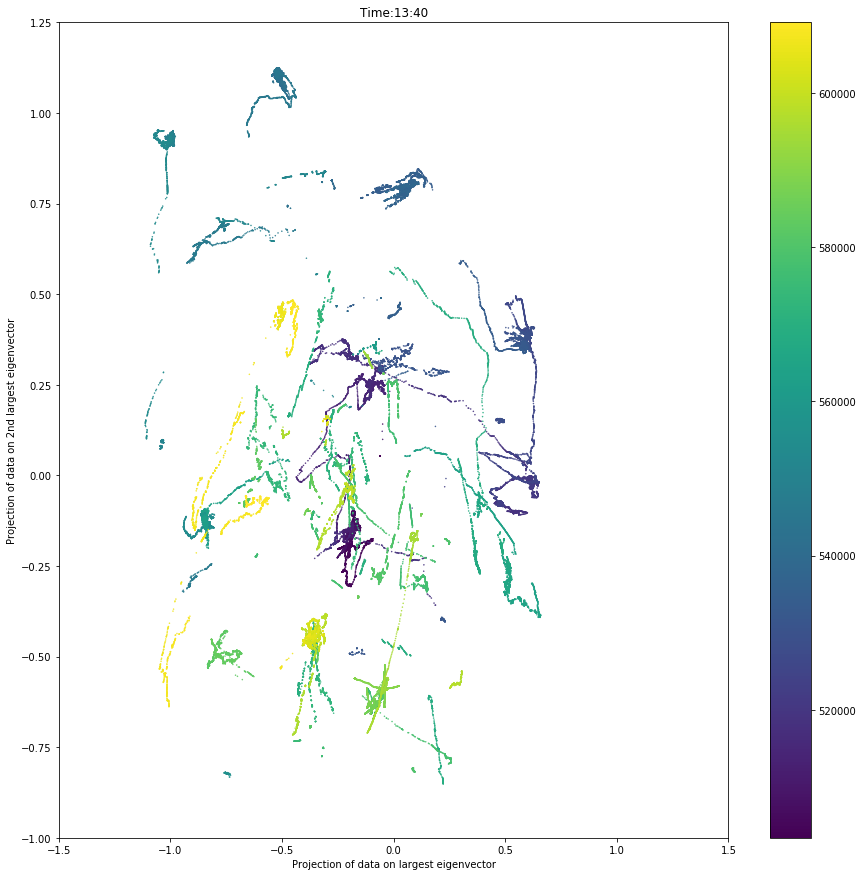

In [19]:
# we can plot the data for our time of interest

figure(figsize=[15,15])
Length= y - x
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,12]))[11:16])
scp = scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')


### Plotting interesting data from the July 15th experiment

In [20]:
# extracting only the relevant x and y coordinates
relevant_data_projections = data_proj_ev1[x:y]
relevant_data_projections.shape

(105808, 2)

In [ ]:
# plotting the relevant data

figure(figsize=[20,20])
Length=4000
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,relevant_data_projections.shape[0],Length):
    subplot(4,4,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[11:16])
    scatter(relevant_data_projections[T1:T1+Length,0], relevant_data_projections[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    colorbar
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    plt.text(relevant_data_projections[T1,0],relevant_data_projections[T1,1], str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,12]))[14:19] + ' s')
    if(i == 1):
        plt.xlabel('largest eigenvector')
        plt.ylabel('2nd largest eigenvector')
    i=i+1
    if (i>12):
        break

Each plot represents activity for 32.0 seconds


### Taking projections onto each eigenvector and plotting magnitudes of the projections

In [ ]:
# taking projections on all (sorted acc. to EV) eigenvectors instead of just the ones corr. to largest EVs

projection_matrix = np.dot(cdata,sorted_eigvec[:,:9])
projection_matrix.shape

In [ ]:
# taking only the ones relevant to experiment
relevant_projection_matrix = projection_matrix[x:y]
relevant_projection_matrix.shape

In [ ]:
plot(relevant_projection_matrix.T, 'o');

### Scratchpad

In [ ]:
# start time:
# end time:
# find elements in data from start time to end time and plot
start_hour = 13
start_minute = 30
# convert start_hour:start_minute:0:0 to timestamp
# find value equal to or closest to that timestamp in data - set to start index
# find value equal to or closest to end timestamp in data - set to end index
# extract subsequence
end_hour = 14
end_minute = 0

In [ ]:
format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Jul 15 2020 01:40PM'
end_timestring = 'Jul 15 2020 02:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

In [ ]:
# convert array of lists to an array of arrays
data = np.zeros((data_with_time_array.shape[0],13))
print(data.shape)
for (index,i) in enumerate(data_with_time_array):
    data[index] = np.asarray(data_with_time_array[index])